> ## Info Miners - ISM6136.003F23.80127 Data Mining - Group Project
>
> Prajay Reddy Minuka
>
> Rakesh Chitrala
>
> Kusuma Yalamarthi
>
> Srija Thota

# Predicting Customer Churn for a Telecom Company

## What is a Churning?

Churning, in a business context, is when customers or subscribers discontinue using a company's offerings, leading to potential revenue loss.

 ## Problem Statement

Over the past decade, the telecommunications industry has witnessed a rapid increase in the number of users. Global Telecommunication Market size was valued at USD 1805.61 billion in 2022 and is expected to grow to USD 3102.74 billion by 2030. However, in today's business landscape, churn has emerged as a significant challenge. For companies, particularly those operating in the telecom sector where acquiring a new customer can cost up to five times more than retaining an existing one, attrition of customers can result in substantial financial repercussions and this high customer acquisition cost is a considerable challenge for businesses. 

Reducing churn and retaining valuable customers is not only crucial for sustaining revenue but also for ensuring long-term profitability and business growth. If a company knows which customer is about to churn, they can proactively implement retention strategies, such as personalized offers, improved customer support, and targeted engagement to mitigate the financial impact of churn and secure their long-term profitability and business growth.

## Objective

The primary objective of this project is to develop a predictive model to effectively identify customers at risk of churning.  Our key goals include:

 - Building an accurate classification model to predict customer churn, enabling the company to proactively address potential churners.

 - Conducting a comprehensive analysis of the dataset to reveal patterns and insights related to the factors and behaviors influencing customer to churn. This analysis will support the development of precise and focused retention strategies.

By achieving these goals, we aim to equip the telecom company with the knowledge needed to effectively identify and implement strategies to address the challenge of customer churn.

## Dataset Description

Source - https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset

The dataset comprises information pertaining to telecom company customers. Below is a concise overview of the dataset's variables:

1. `Call Failures`: The count of call failures.
2. `Complains`: A binary variable (0: No complaint, 1: Complaint).
3. `Subscription Length`: The total duration of subscription in months.
4. `Charge Amount`: An ordinal attribute (0: Lowest amount, 9: Highest amount).
5. `Seconds of Use`: The total duration of call usage in seconds.
6. `Frequency of Use`: The total count of calls made.
7. `Frequency of SMS`: The total count of text messages sent.
8. `Distinct Called Numbers`: The total count of distinct phone numbers called.
9. `Age Group`: An ordinal attribute (1: Younger age, 5: Older age).
10. `Tariff Plan`: A binary attribute (1: Pay as you go, 2: Contractual).
11. `Status`: A binary attribute (1: Active, 2: Non-active).
12. `Age`: The age of the customer.
13. `Customer Value`: The calculated value of the customer.

Target Variable:

`Churn`: (1: Churn, 0: Non-churn) - Class label indicating whether the customer has churned or not.


All of the attributes except for attribute churn is the aggregated data of the first 9 months. The churn labels are the state of the customers at the end of 12 months. The three months is the designated planning gap for the company.

__Importing the required libraries__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from imblearn.over_sampling import ADASYN

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, make_scorer,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance

np.random.seed(42)

__Importing the Data__

In [2]:
df = pd.read_csv("Customer Churn.csv",sep = ',')

__Checking if the data has been imported properly__

In [3]:
df.head(10)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
5,11,0,38,1,3775,82,32,28,3,1,1,30,282.280,0
6,4,0,38,0,2360,39,285,18,3,1,1,30,1235.960,0
7,13,0,37,2,9115,121,144,43,3,1,1,30,945.440,0
8,7,0,38,0,13773,169,0,44,3,1,1,30,557.680,0
9,7,0,38,1,4515,83,2,25,3,1,1,30,191.920,0


__Checking column names for typos, converting them to uppercase and removing whitespaces for consistency__

In [4]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

In [5]:
df.columns = [c.strip().upper().replace(' ', '_') for c in df.columns] 
df.columns

Index(['CALL__FAILURE', 'COMPLAINS', 'SUBSCRIPTION__LENGTH', 'CHARGE__AMOUNT',
       'SECONDS_OF_USE', 'FREQUENCY_OF_USE', 'FREQUENCY_OF_SMS',
       'DISTINCT_CALLED_NUMBERS', 'AGE_GROUP', 'TARIFF_PLAN', 'STATUS', 'AGE',
       'CUSTOMER_VALUE', 'CHURN'],
      dtype='object')

## Data Cleaning and  Exploratory data analysis

__Lets check if there are any missing values and inspect the column types__

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CALL__FAILURE            3150 non-null   int64  
 1   COMPLAINS                3150 non-null   int64  
 2   SUBSCRIPTION__LENGTH     3150 non-null   int64  
 3   CHARGE__AMOUNT           3150 non-null   int64  
 4   SECONDS_OF_USE           3150 non-null   int64  
 5   FREQUENCY_OF_USE         3150 non-null   int64  
 6   FREQUENCY_OF_SMS         3150 non-null   int64  
 7   DISTINCT_CALLED_NUMBERS  3150 non-null   int64  
 8   AGE_GROUP                3150 non-null   int64  
 9   TARIFF_PLAN              3150 non-null   int64  
 10  STATUS                   3150 non-null   int64  
 11  AGE                      3150 non-null   int64  
 12  CUSTOMER_VALUE           3150 non-null   float64
 13  CHURN                    3150 non-null   int64  
dtypes: float64(1), int64(13)

No missing values found, hence no further processing is required to handle them.

According to the dataset information, we have several encoded categorical columns in our dataset that are currently marked as integers. Let's proceed to update their information and datatypes accordingly for our analysis.

In [7]:
df['COMPLAINS'] = df['COMPLAINS'].apply(str)
df['CHARGE__AMOUNT'] = df['CHARGE__AMOUNT'].apply(str)
df['AGE_GROUP'] = df['AGE_GROUP'].apply(str)
df['TARIFF_PLAN'] = df['TARIFF_PLAN'].apply(str)
df['STATUS'] = df['STATUS'].apply(str)
df['CHURN'] = df['CHURN'].apply(str)

In [8]:
df.COMPLAINS.value_counts()

COMPLAINS
0    2909
1     241
Name: count, dtype: int64

In [9]:
df['COMPLAINS'] = df['COMPLAINS'].map({'1': 'Complain', '0': 'No Complain'})
df.COMPLAINS.value_counts()

COMPLAINS
No Complain    2909
Complain        241
Name: count, dtype: int64

In [10]:
df.TARIFF_PLAN.value_counts()

TARIFF_PLAN
1    2905
2     245
Name: count, dtype: int64

In [11]:
df['TARIFF_PLAN'] = df['TARIFF_PLAN'].map({'1': 'Pay as you go', '2': 'Contractual'})
df.TARIFF_PLAN.value_counts()

TARIFF_PLAN
Pay as you go    2905
Contractual       245
Name: count, dtype: int64

In [12]:
df.STATUS.value_counts()

STATUS
1    2368
2     782
Name: count, dtype: int64

In [13]:
df['STATUS'] = df['STATUS'].map({'1': 'Active', '2': 'Non-Active'})
df.STATUS.value_counts()

STATUS
Active        2368
Non-Active     782
Name: count, dtype: int64

In [14]:
df['CHURN'] = df['CHURN'].map({'1': 'yes', '0': 'no'})
df.CHURN.value_counts()

CHURN
no     2655
yes     495
Name: count, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CALL__FAILURE            3150 non-null   int64  
 1   COMPLAINS                3150 non-null   object 
 2   SUBSCRIPTION__LENGTH     3150 non-null   int64  
 3   CHARGE__AMOUNT           3150 non-null   object 
 4   SECONDS_OF_USE           3150 non-null   int64  
 5   FREQUENCY_OF_USE         3150 non-null   int64  
 6   FREQUENCY_OF_SMS         3150 non-null   int64  
 7   DISTINCT_CALLED_NUMBERS  3150 non-null   int64  
 8   AGE_GROUP                3150 non-null   object 
 9   TARIFF_PLAN              3150 non-null   object 
 10  STATUS                   3150 non-null   object 
 11  AGE                      3150 non-null   int64  
 12  CUSTOMER_VALUE           3150 non-null   float64
 13  CHURN                    3150 non-null   object 
dtypes: float64(1), int64(7),

__Lets look at the distribution of the numerical columns__ ___(Labeled as object in int64 above)___

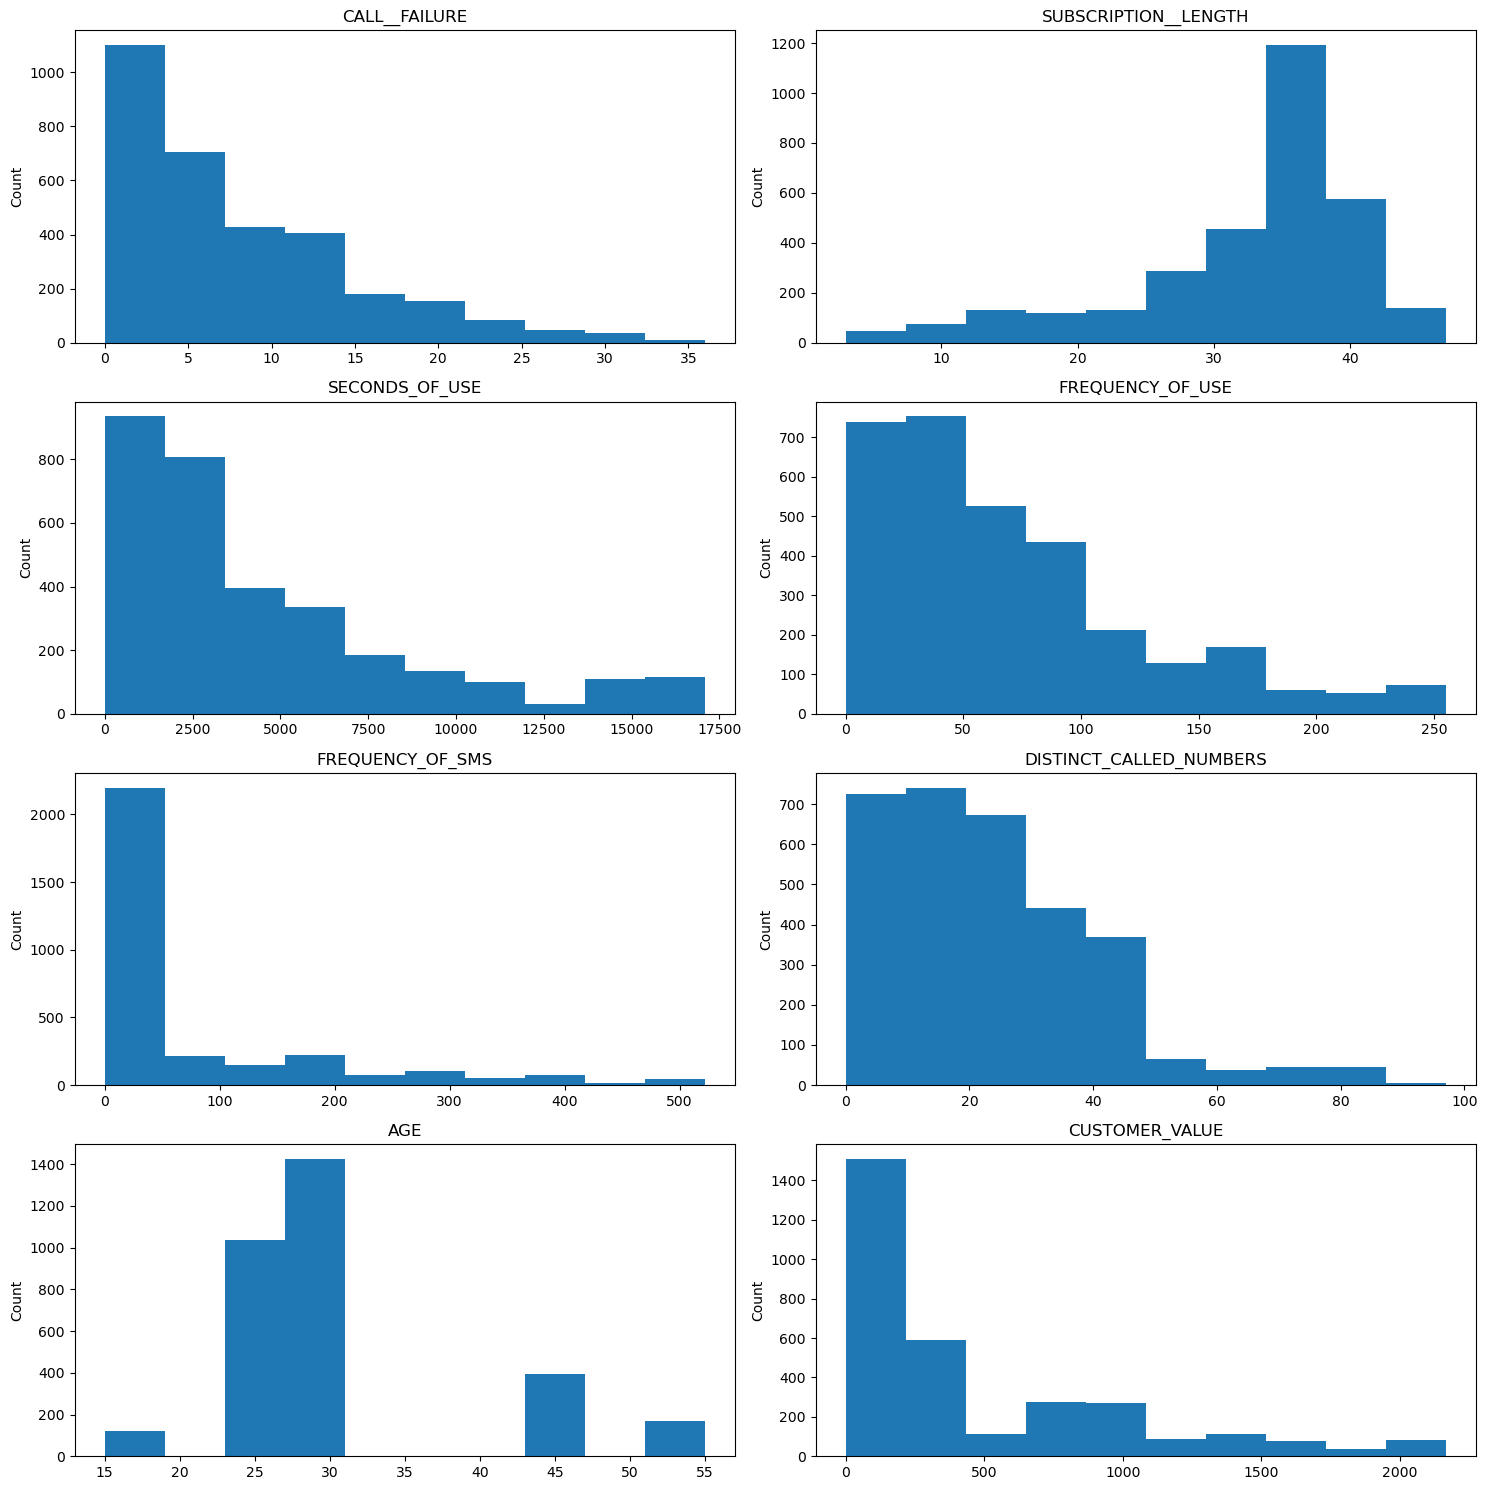

In [16]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.ravel()

subplot_counter = 0

for column in df:
    if df[column].dtype != 'object':
    
        ax = axes[subplot_counter]
        ax.hist(df[column])
        ax.set_ylabel("Count")
        ax.set_title(column)

        subplot_counter += 1
        
plt.tight_layout()
plt.show()

In [17]:
df[['CALL__FAILURE', 'SUBSCRIPTION__LENGTH','SECONDS_OF_USE','FREQUENCY_OF_USE','FREQUENCY_OF_SMS','DISTINCT_CALLED_NUMBERS','AGE','CUSTOMER_VALUE']].describe()

,CALL__FAILURE,SUBSCRIPTION__LENGTH,SECONDS_OF_USE,FREQUENCY_OF_USE,FREQUENCY_OF_SMS,DISTINCT_CALLED_NUMBERS,AGE,CUSTOMER_VALUE
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,32.541905,4472.459683,69.460635,73.174921,23.509841,30.998413,470.972916
std,7.263886,8.573482,4197.908687,57.413308,112.237560,17.217337,8.831095,517.015433
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,1.000000,30.000000,1391.250000,27.000000,6.000000,10.000000,25.000000,113.801250
50%,6.000000,35.000000,2990.000000,54.000000,21.000000,21.000000,30.000000,228.480000
75%,12.000000,38.000000,6478.250000,95.000000,87.000000,34.000000,30.000000,788.388750
max,36.000000,47.000000,17090.000000,255.000000,522.000000,97.000000,55.000000,2165.280000



**CALL_FAILURE:**
  - The average number of call failures is relatively low at 7.63 per customer. This suggests that, on average, most customers do not experience significant call issues.

**SUBSCRIPTION_LENGTH:**
   - The majority of customers have been with the company for over 3 years, as indicated by the leftward skew in the distribution of subscription lengths. The average subscription length of approximately 32.54 months reflects a high level of customer retention.

**SECONDS_OF_USE:**
   - The right-skewed distribution of call usage minutes implies that most customers utilize fewer talk minutes. This could have implications for pricing plans and service offerings.

**FREQUENCY_OF_USE:**
   - With an average usage frequency of approximately 69.46, most customers use the service at a moderate rate, with only a few highly active users.

**FREQUENCY_OF_SMS:**
   - The right-skewed distribution of SMS usage suggests that the majority of customers send fewer than 70 text messages. This could impact SMS-related marketing strategies and pricing plans.

**DISTINCT_CALLED_NUMBERS:**
   - On average, customers call approximately 23.51 distinct numbers. The fact that 75% of customers contact 34 or fewer distinct numbers indicates a relatively close-knit network of contacts.
   
**AGE:**
   - The average age of customers is around 30.99 years, suggesting a broad demographic range among the customer base.

**CUSTOMER_VALUE:**
   - The right-skewed plot for customer value indicates that the majority of customers have a low customer value. This might require attention in terms of customer engagement and loyalty programs to increase customer lifetime value.

__Lets look at the distribution of the categorical columns__ ___(Labeled as object in Dtype above)___

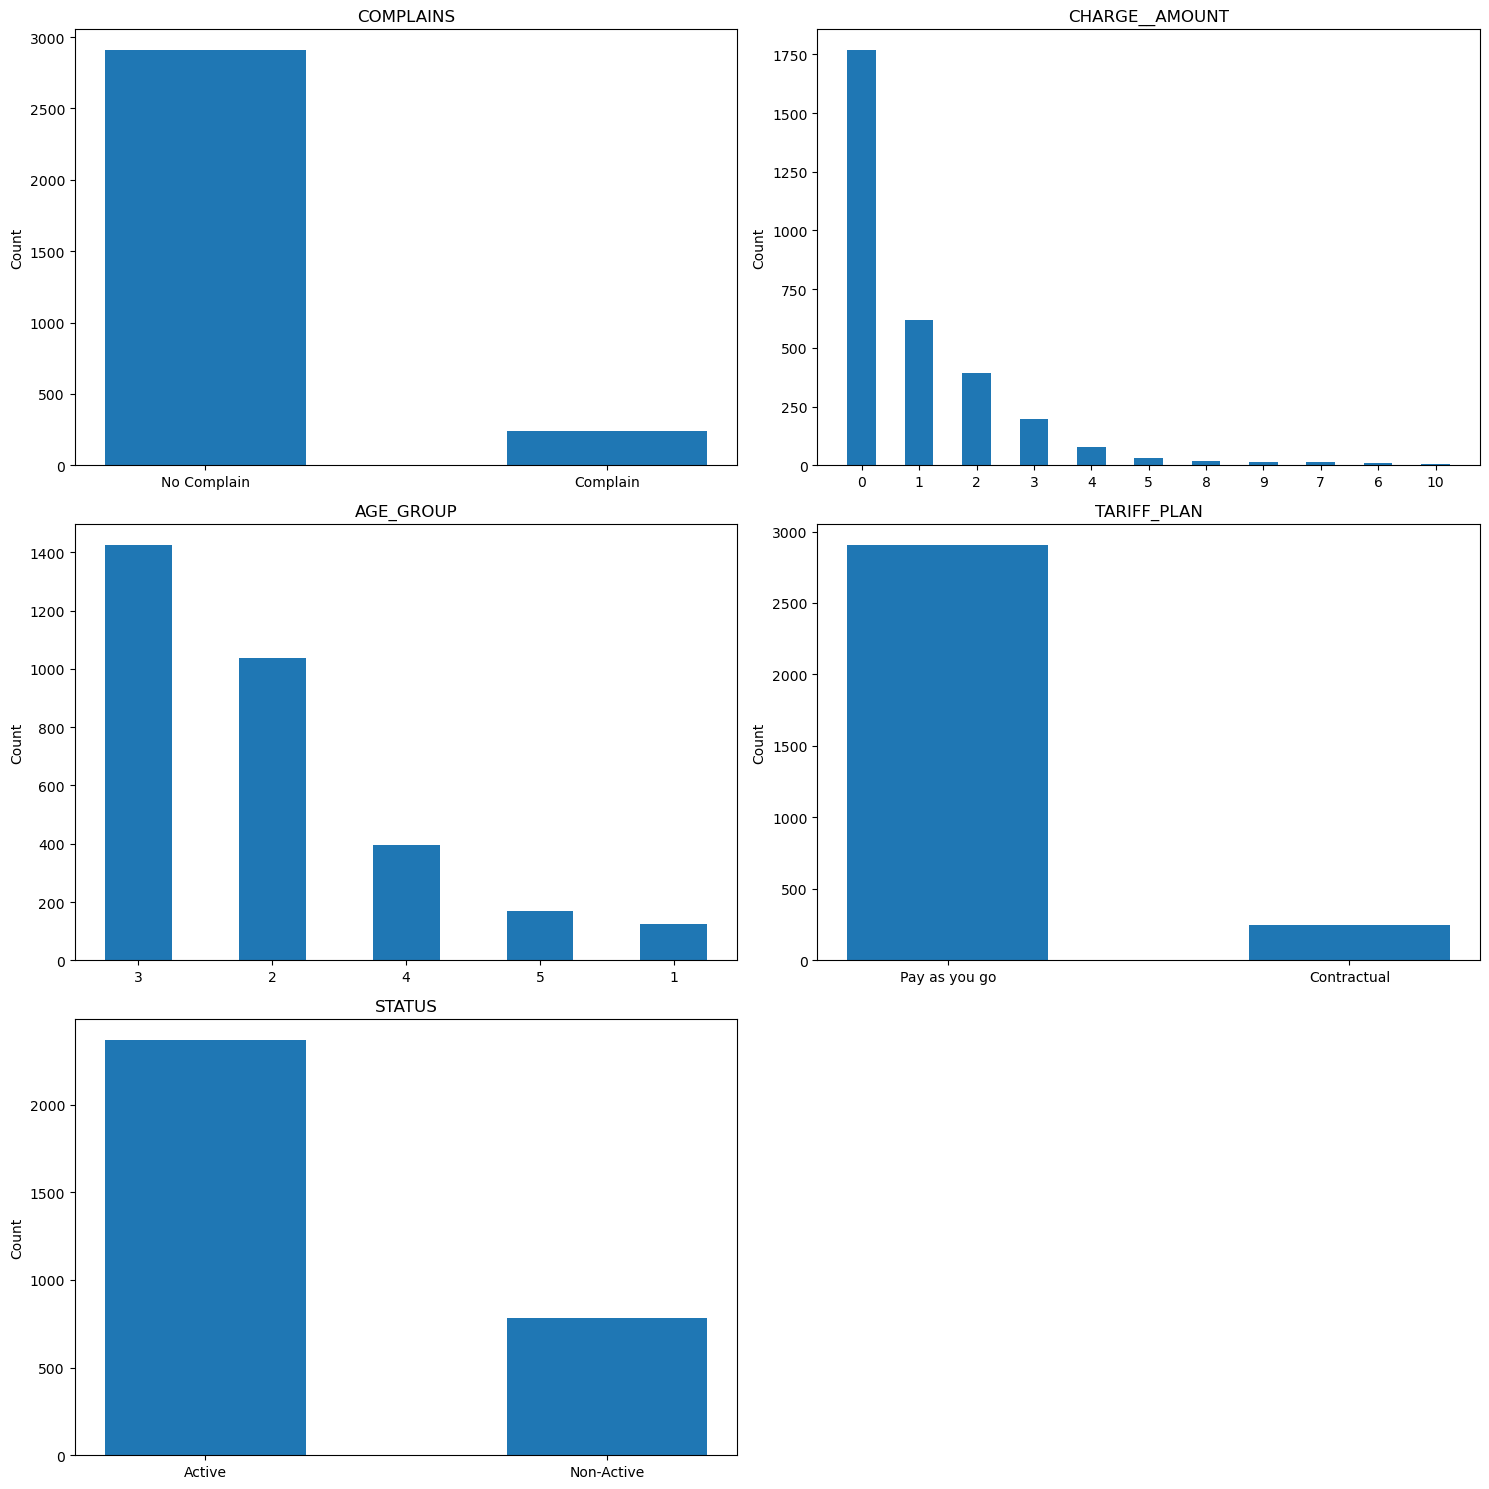

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()

subplot_counter = 0

for column in df:
    if df[column].dtype == 'object' and column != 'CHURN' :
        categories = df[column].value_counts().index
        counts = df[column].value_counts().values

        ax = axes[subplot_counter]
        ax.bar(categories, counts, width=0.5)
        ax.tick_params(axis='x')
        ax.set_ylabel("Count")
        ax.set_title(column)
        
        subplot_counter += 1
        
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

**Complaints Analysis:**
   - A minority of customers (around 7%) have filed complaints, suggesting that the majority of customers are satisfied with the service.

**Charge Amount Distribution:**
   - The distribution of charge amounts is skewed towards lower values (e.g., 0, 1, 2), indicating that a significant portion of customers is in lower charge categories.
   - This could be useful for pricing strategies, such as offering tailored packages or promotions for customers in different charge categories.

**Age Group Composition:**
   - The dataset has a relatively balanced distribution of customers across age groups, with the most significant concentration in Group 3.

**Tariff Plan Usage:**
   - Most customers are on Tariff Plan 1 (Pay as you go), suggesting that a substantial portion of the customer base prefers this type of plan.
   - Tailoring marketing and communication strategies to these different customer segments can be beneficial.

**Customer Status Distribution:**
   - The majority of customers are in an active status, while a smaller but still significant portion is in a non-active status.
   - Further investigation into the reasons for non-active status and strategies to retain or reactivate these customers may be necessary.

In [19]:
df[['CALL__FAILURE', 'SUBSCRIPTION__LENGTH','CHARGE__AMOUNT','SECONDS_OF_USE','FREQUENCY_OF_USE','FREQUENCY_OF_SMS','DISTINCT_CALLED_NUMBERS','AGE','CUSTOMER_VALUE']].describe()

,CALL__FAILURE,SUBSCRIPTION__LENGTH,SECONDS_OF_USE,FREQUENCY_OF_USE,FREQUENCY_OF_SMS,DISTINCT_CALLED_NUMBERS,AGE,CUSTOMER_VALUE
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,32.541905,4472.459683,69.460635,73.174921,23.509841,30.998413,470.972916
std,7.263886,8.573482,4197.908687,57.413308,112.237560,17.217337,8.831095,517.015433
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,1.000000,30.000000,1391.250000,27.000000,6.000000,10.000000,25.000000,113.801250
50%,6.000000,35.000000,2990.000000,54.000000,21.000000,21.000000,30.000000,228.480000
75%,12.000000,38.000000,6478.250000,95.000000,87.000000,34.000000,30.000000,788.388750
max,36.000000,47.000000,17090.000000,255.000000,522.000000,97.000000,55.000000,2165.280000


__Now lets see which categories in each categorical columns have the highest influence on Customer Churn__

In [20]:
def plot_grouped_bar(df, column):
    types = df.groupby(column)['CHURN'].value_counts(normalize=False).unstack()
    types['Total'] = types['yes'] / (types['yes'] + types['no'])
    types_sorted = types.sort_values(by='Total', ascending=False)

    ax = types_sorted.drop(columns='Total').plot(kind='bar', figsize=(10, 6))

    ax.set_title(f'Churn Distribution by {column}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height() + 5), ha='center', va='bottom', fontsize=10, color='black')

    plt.show()


__These plots are sorted decreasingly on total percentage of clients who churned__

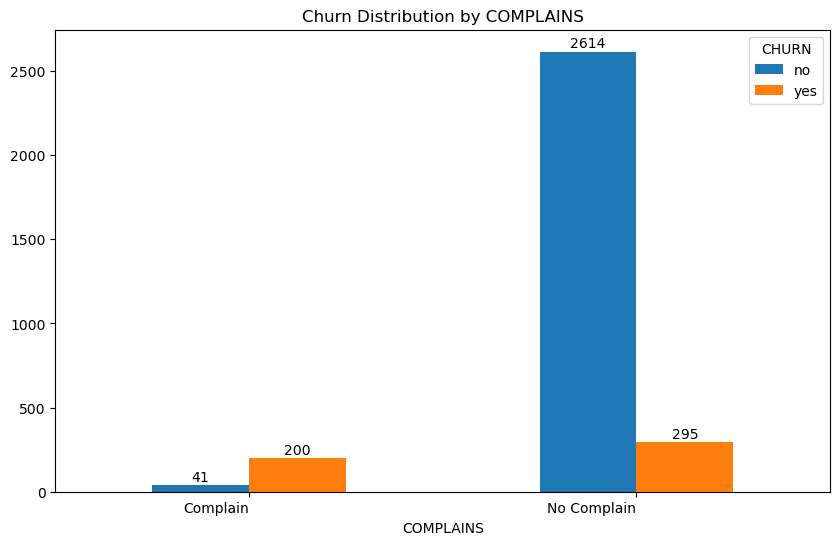

In [21]:
plot_grouped_bar(df,'COMPLAINS')

The plot indicates a substantial correlation between customer complaints and churn, with a significantly higher churn rate among those who have filed complaints compared to those who haven't. To reduce churn, the company should focus on actively addressing and resolving customer complaints promptly and effectively. Implementing a robust customer support system, emphasizing complaint resolution, and actively seeking feedback to prevent recurring issues can be pivotal in enhancing customer satisfaction and retention. Additionally, the company should consider offering incentives or loyalty programs to customers who have complained but decided to stay, as a way to rebuild trust and improve their overall experience.

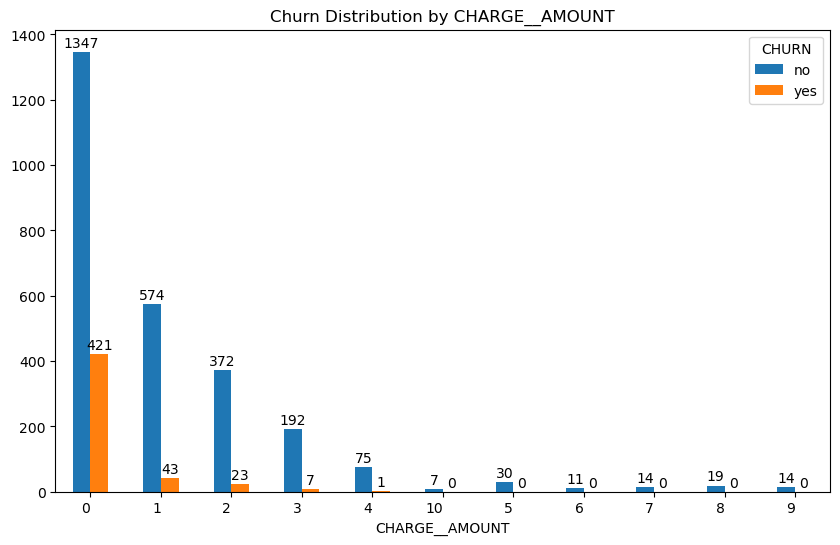

In [22]:
plot_grouped_bar(df,'CHARGE__AMOUNT')

The plot reveals a notable correlation between charge amounts and customer churn, with lower charge amounts showing higher churn rates. This observation suggests that customers with lower charge amounts may be more prone to churning. It's worth considering that this phenomenon could be attributed, in part, to customers availing free trials, promotional offers, or lower-cost plans, which may result in a higher initial sign-up rate but a higher likelihood of churning in the long term. To mitigate this churn, the company should analyze the impact of free trials and promotions on customer retention and develop strategies to convert these customers into long-term subscribers.

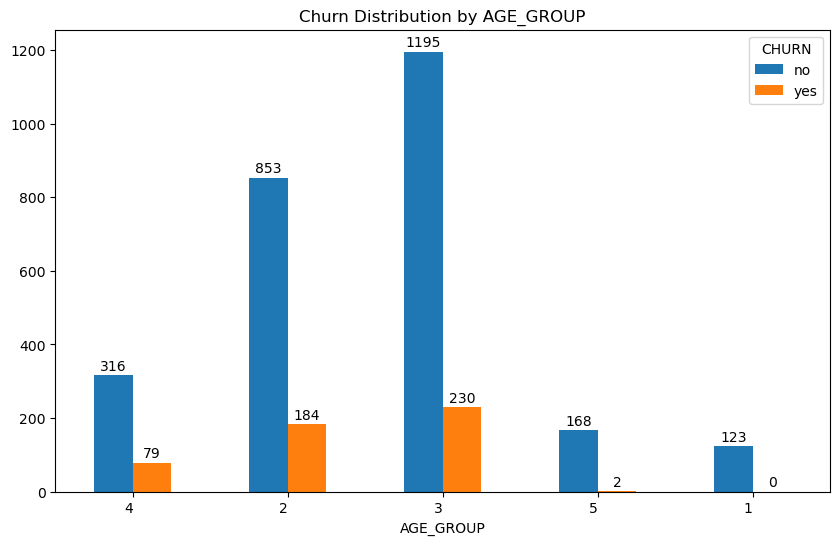

In [23]:
plot_grouped_bar(df,'AGE_GROUP')

Based on the plot, it does not appear that there is a clear correlation between AGE_GROUP and CHURN. The churn rates across different age groups vary, and there is no consistent trend.

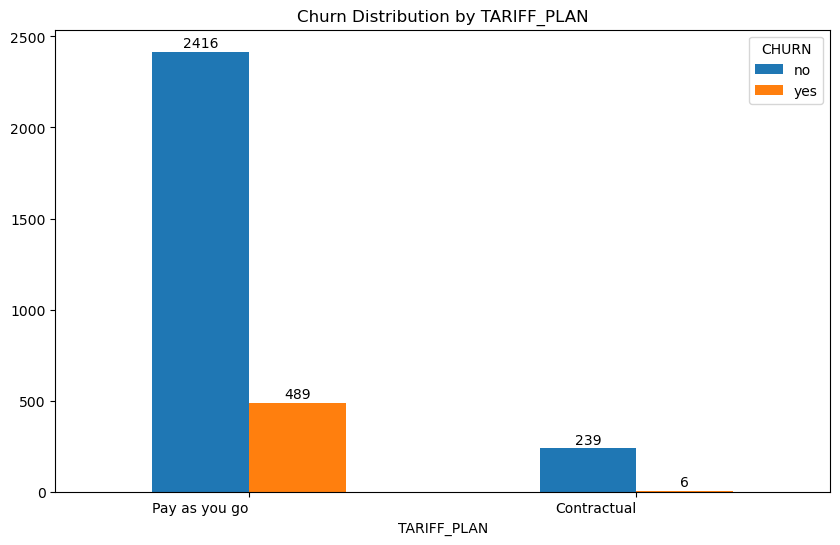

In [24]:
plot_grouped_bar(df,'TARIFF_PLAN')

It's evident that customers on the "Contractual" tariff plan (TARIFF_PLAN=2) have a significantly lower churn rate compared to those on the "Pay as you go" plan (TARIFF_PLAN=1). This finding underscores the importance of contractual agreements in reducing churn and highlights the potential benefit of promoting and offering more contractual options to customers as a retention strategy.

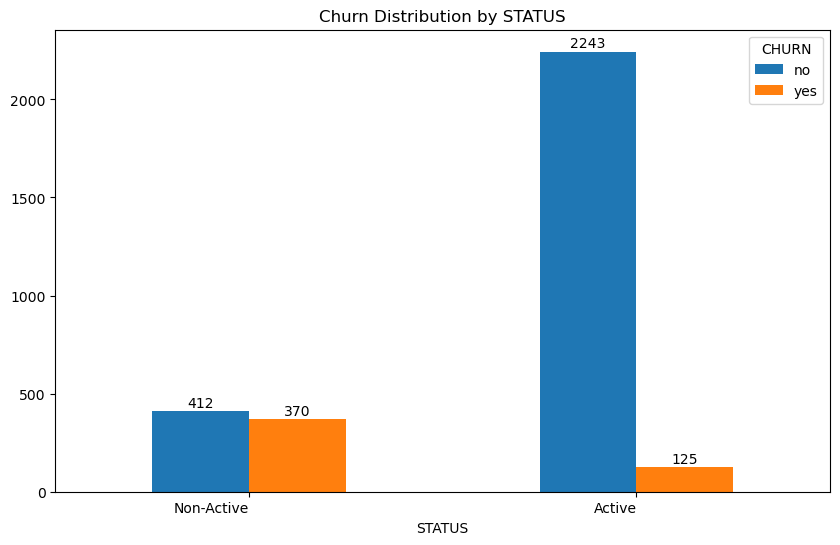

In [25]:
plot_grouped_bar(df,'STATUS')

Customers with a status of "2" (non-active) exhibit a considerably higher churn rate, while customers with a status of "1" (active) have a significantly lower churn rate. This suggests that non-active customers are more likely to churn, underscoring the importance of retaining active customers. To reduce churn, the company should focus on understanding the factors leading to non-active status and develop strategies to re-engage and retain these customers. 

__Lets look at the distribution of the target variable__

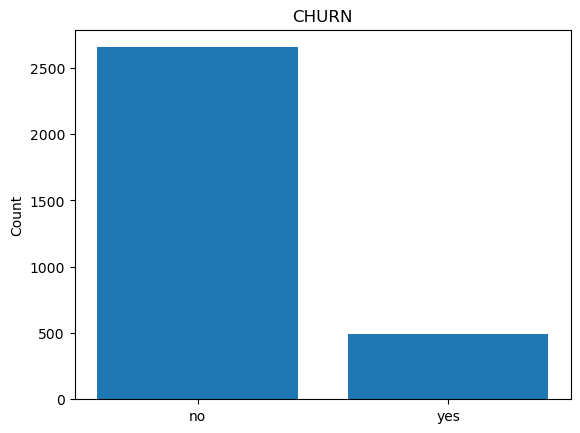

In [26]:
plt.bar(df['CHURN'].value_counts().index,df['CHURN'].value_counts().values)
plt.ylabel("Count")
plt.title('CHURN')
plt.show()

__Distribution of values in the target variable__

In [27]:
(df['CHURN'].value_counts() / df['CHURN'].value_counts().sum()) * 100

CHURN
no     84.285714
yes    15.714286
Name: count, dtype: float64

The dataset exhibits a significant class imbalance, where only about 15% of the clients have churned with a higher proportion of customers not churning. This imbalance can pose challenges for predictive modeling, as it may lead to biased model performance. To address this issue, data balancing techniques such as oversampling the minority class, undersampling the majority class, or using more advanced methods like SMOTE or ASADYN can be applied. Balancing the data is crucial to ensure that the model doesn't skew its predictions towards the majority class and can make more accurate predictions for the minority class.

# Data Preprocessing 

We will be using one-hot encoding to handle categorical data because it helps capture the categorical data's distinct categories without imposing ordinality or hierarchy. One-hot encoding transforms categorical variables into binary columns, where each category is represented as a separate binary feature. This approach is particularly useful when dealing with nominal data, where there is no inherent order or relationship between categories. It ensures that the machine learning model can understand and make predictions based on the categorical data effectively.

Lets look at the categorical columns

In [28]:
df['COMPLAINS'].value_counts()

COMPLAINS
No Complain    2909
Complain        241
Name: count, dtype: int64

An heirarchy can be established, so we can replace the values with 0 and 1

In [29]:
df['COMPLAINS'] = df['COMPLAINS'].map({'Complain': 1, 'No Complain': 0})
df['COMPLAINS'].value_counts()

COMPLAINS
0    2909
1     241
Name: count, dtype: int64

In [30]:
df['CHARGE__AMOUNT'].value_counts()

CHARGE__AMOUNT
0     1768
1      617
2      395
3      199
4       76
5       30
8       19
9       14
7       14
6       11
10       7
Name: count, dtype: int64

As the data is already ordinal, we'll convert them into integers

In [31]:
df['CHARGE__AMOUNT'] = df['CHARGE__AMOUNT'].apply(int)

In [32]:
df['AGE_GROUP'].value_counts()

AGE_GROUP
3    1425
2    1037
4     395
5     170
1     123
Name: count, dtype: int64

As the data is already ordinal, we'll convert them into integers

In [33]:
df['AGE_GROUP'] = df['AGE_GROUP'].apply(int)

In [34]:
df['TARIFF_PLAN'].value_counts()

TARIFF_PLAN
Pay as you go    2905
Contractual       245
Name: count, dtype: int64

An heirarchy cannot be established,we will need to encode this using one-hot encoding

In [35]:
df['STATUS'].value_counts()

STATUS
Active        2368
Non-Active     782
Name: count, dtype: int64

An heirarchy can be established, so we can replace the values with 0 and 1

In [36]:
df['STATUS'] = df['STATUS'].map({'Active': 1, 'Non-Active': 0})
df['STATUS'].value_counts()

STATUS
1    2368
0     782
Name: count, dtype: int64

__Using one hot encoding to create dummy variables__

In [37]:
df_dummy = pd.get_dummies(
    df, 
    prefix_sep='_', 
    dummy_na=False, 
    drop_first=False, 
    columns=['TARIFF_PLAN'], 
    dtype='int32'
)

In [38]:
df_dummy.head()

,CALL__FAILURE,COMPLAINS,SUBSCRIPTION__LENGTH,CHARGE__AMOUNT,SECONDS_OF_USE,FREQUENCY_OF_USE,FREQUENCY_OF_SMS,DISTINCT_CALLED_NUMBERS,AGE_GROUP,STATUS,AGE,CUSTOMER_VALUE,CHURN,TARIFF_PLAN_Contractual,TARIFF_PLAN_Pay as you go
0,8,0,38,0,4370,71,5,17,3,1,30,197.640,no,0,1
1,0,0,39,0,318,5,7,4,2,0,25,46.035,no,0,1
2,10,0,37,0,2453,60,359,24,3,1,30,1536.520,no,0,1
3,10,0,38,0,4198,66,1,35,1,1,15,240.020,no,0,1
4,3,0,38,0,2393,58,2,33,1,1,15,145.805,no,0,1


Altering the target variable to contain only 1's and 0's

In [39]:
df_dummy['CHURN'] = df_dummy['CHURN'].map({'yes': 1, 'no': 0})

Since there are two columns representing age, lets drop one of them

In [40]:
df_dummy = df_dummy.drop(columns=['AGE'])

__Lets split the data into features and target__

In [41]:
features = df_dummy.drop(columns=['CHURN'])
target = df_dummy['CHURN']

__Lets split the data into train and test set__

In [42]:
len(df_dummy)

3150

### As we have 3150 records, we will have sufficient records to train our model if we utilise 20% of the data for testing

In [43]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

__Normalizing Data__

We will normalize the data after splitting to avoid data leakage. This practice ensures that the scaling of the data is performed independently on the training and testing datasets, preventing any information from the test set influencing the scaling process and maintaining the integrity of the model evaluation.

The standard scaler function will standardize our variables. To achieve this, we will first need to train the scaler on the training data and then apply this trained scaler to standardize both the training and validation sets. 

In [44]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

## Balancing the data

As discussed that the dataset is imbalanced, lets balance it

There are several methods to balance the data.

Oversampling will add more data points from the minority class can lead the model to memorize the noise in the data rather than generalize, resulting in overfitting.

Undersampling will reduce the data which inturn reduces the amount of data that we feed the model.

SMOTE operates based on the k-nearest neighbors principle, which could introduce noise if the neighbors are not carefully chosen or if k_neighbors is set too high.

ADASYN Often provides better classifier performance on the minority class. So we will use ADASYN for balancing this dataset.

In [45]:
adasyn = ADASYN(random_state=42)
X_res_train, y_res_train = adasyn.fit_resample(X_train, y_train)

Let's see if there is any change

In [46]:
y_train.value_counts()

CHURN
0    2135
1     385
Name: count, dtype: int64

In [47]:
y_res_train.value_counts()

CHURN
0    2135
1    2122
Name: count, dtype: int64

__It is clear that the classes are balanced now__

# Data Modeling

## Choice of Metric

The possible outcomes of predictions in this business case are -

**True Positive (TP)**: This represents instances where the model correctly predicts customers who are at risk of churning. 

**True Negative (TN)**: This reflects instances where the model correctly predicts customers who are not at risk of churning. 

**False Positive (FP)**: This occurs when the model incorrectly predicts customers as being at risk of churning when they are not. These are false alarms or instances where intervention may be unnecessary.

**False Negative (FN)**: This indicates situations where the model incorrectly predicts customers as not being at risk of churning when they are. This is a critical area of concern as it may lead to the loss of customers and future revenue for the company.

In this business case where customer churn is a significant concern, minimizing false negatives (FN) is more important than minimizing false positives (FP), therefore prioritizing __recall__ as the metric is an appropriate choice. Maximizing recall ensures that the model is effective at identifying as many customers at risk of churning as possible. This approach aligns with the initial goal of retaining customers and reducing churn, as it places a strong emphasis on capturing all potential churn cases.


Considering the cost implications of false positives (FP) for the company (spending on promotion strategies for customers who are not likely to churn), we will also take into account the __F2__ score in our evaluation, as it provides a weighted balance between precision and recall, giving higher importance to recall while still considering precision. This approach allows us to better address the cost of FP while not neglecting other important performance metrics.

 Now lets train different classification models using the dataset

## Logistic Regression

In [48]:
logreg_model = LogisticRegression()
logreg_model.fit(X_res_train,y_res_train)

y_pred_log = logreg_model.predict(X_test)


print("************************************")
print('Performace of Logistic Regression')
print("************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred_log)}")
print(f"{'F2 Score:':18}{fbeta_score(y_test, y_pred_log,beta=2, average='binary')}")
print("************************************")

************************************
Performace of Logistic Regression
************************************
Recall Score:     0.8727272727272727
F2 Score:         0.7350689127105665
************************************


# Linear SVM

In [49]:
svml_model= SVC(kernel = 'linear')
svml_model.fit(X_res_train,y_res_train)

y_pred_svml = svml_model.predict(X_test)

print("************************************")
print('Performace of Linear SVM')
print("************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred_svml)}")
print(f"{'F2 Score:':18}{fbeta_score(y_test, y_pred_svml,beta=2, average='binary')}")
print("************************************")

************************************
Performace of Linear SVM
************************************
Recall Score:     0.8272727272727273
F2 Score:         0.7268370607028755
************************************


## Non - Linear SVM

In [50]:
svm_model= SVC(kernel = 'rbf')
svm_model.fit(X_res_train,y_res_train)

y_pred_svm = svm_model.predict(X_test)

print("************************************")
print('Performace of SVM')
print("************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred_svm)}")
print(f"{'F2 Score:':18}{fbeta_score(y_test, y_pred_svm,beta=2, average='binary')}")
print("************************************")

************************************
Performace of SVM
************************************
Recall Score:     0.9727272727272728
F2 Score:         0.8465189873417722
************************************


## KNN

We are setting the default number of neighbors to the square root of our training dataset size, which is an optimal choice.

In [51]:
knn_model = KNeighborsClassifier(n_neighbors=round(len(y_res_train)**0.5)) 

knn_model.fit(X_res_train,y_res_train)

y_pred_knn = knn_model.predict(X_test)

print("************************************")
print('Performace of KNN')
print("************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred_knn)}")
print(f"{'F2 Score:':18}{fbeta_score(y_test, y_pred_knn,beta=2, average='binary')}")
print("************************************")

************************************
Performace of KNN
************************************
Recall Score:     0.9727272727272728
F2 Score:         0.8281733746130032
************************************


## Decision Tree

In [52]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_res_train,y_res_train)

y_pred_dtree = dtree_model.predict(X_test)

print("************************************")
print('Performace of Decision Tree')
print("************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred_dtree)}")
print(f"{'F2 Score:':18}{fbeta_score(y_test, y_pred_dtree,beta=2, average='binary')}")
print("************************************")

************************************
Performace of Decision Tree
************************************
Recall Score:     0.7090909090909091
F2 Score:         0.7129798903107861
************************************


## Random Forest

In [53]:
rf_model = RandomForestClassifier()
rf_model.fit(X_res_train,y_res_train)

y_pred_rf = rf_model.predict(X_test)

print("************************************")
print('Performace of Random Forest')
print("************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred_rf)}")
print(f"{'F2 Score:':18}{fbeta_score(y_test, y_pred_rf,beta=2, average='binary')}")
print("************************************")

************************************
Performace of Random Forest
************************************
Recall Score:     0.8636363636363636
F2 Score:         0.8497316636851521
************************************


## ADABoost Classifier

In [54]:
ab_model = AdaBoostClassifier()
ab_model.fit(X_res_train,y_res_train)

y_pred_ab = ab_model.predict(X_test)

print("************************************")
print('Performace of ADABoost')
print("************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred_ab)}")
print(f"{'F2 Score:':18}{fbeta_score(y_test, y_pred_ab,beta=2, average='binary')}")
print("************************************")

************************************
Performace of ADABoost
************************************
Recall Score:     0.9
F2 Score:         0.8114754098360657
************************************


## GradientBoosting Classifier

In [55]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_res_train,y_res_train)

y_pred_gb = gb_model.predict(X_test)

print("************************************")
print('Performace of GradientBoosting Classifier')
print("************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred_gb)}")
print(f"{'F2 Score:':18}{fbeta_score(y_test, y_pred_gb,beta=2, average='binary')}")
print("************************************")

************************************
Performace of GradientBoosting Classifier
************************************
Recall Score:     0.9
F2 Score:         0.8404074702886248
************************************


## Neural Networks

In [56]:
nn_model = MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=10000, random_state=42)
nn_model.fit(X_res_train,y_res_train)

y_pred_nn = nn_model.predict(X_test)

print("************************************")
print('Performace of Neural Networks')
print("************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred_nn)}")
print(f"{'F2 Score:':18}{fbeta_score(y_test, y_pred_nn,beta=2, average='binary')}")
print("************************************")

************************************
Performace of Neural Networks
************************************
Recall Score:     0.8909090909090909
F2 Score:         0.8749999999999999
************************************


# Model Comparisions

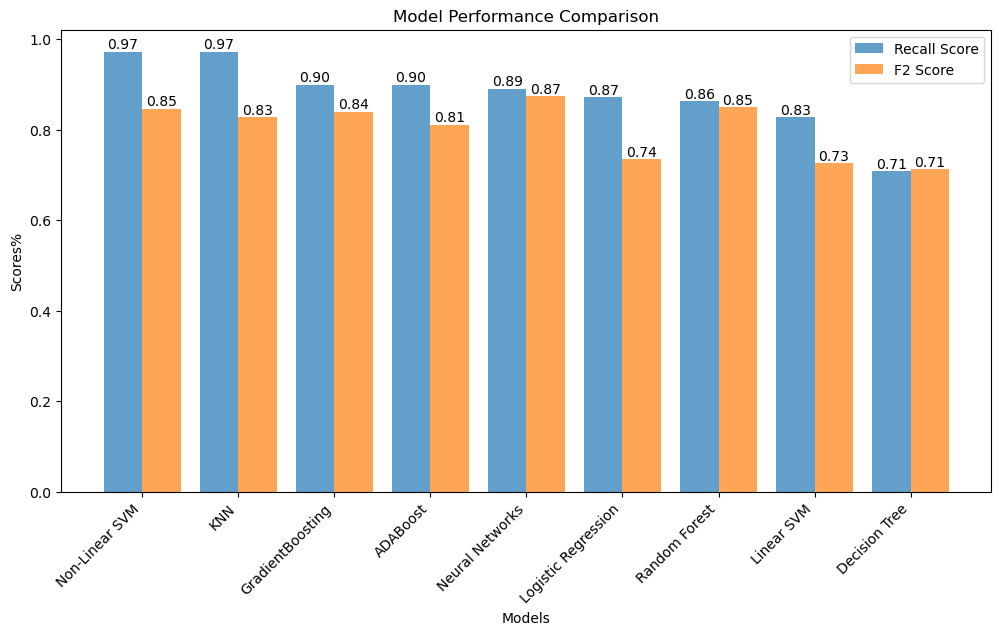

In [57]:
models = [
    "Logistic Regression",
    "Linear SVM",
    "Non-Linear SVM",
    "KNN",
    "Decision Tree",
    "Random Forest",
    "ADABoost",
    "GradientBoosting",
    "Neural Networks"
]

recall_scores = [recall_score(y_test, y_pred_log), recall_score(y_test, y_pred_svml), recall_score(y_test, y_pred_svm), recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_dtree), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_ab), recall_score(y_test, y_pred_gb), recall_score(y_test, y_pred_nn)]
f2_scores = [fbeta_score(y_test, y_pred_log,beta =2,average='binary'), fbeta_score(y_test, y_pred_svml,beta =2,average='binary'), fbeta_score(y_test, y_pred_svm,beta =2,average='binary'), fbeta_score(y_test, y_pred_knn,beta =2,average='binary'), fbeta_score(y_test, y_pred_dtree,beta =2,average='binary'), fbeta_score(y_test, y_pred_rf,beta =2,average='binary'), fbeta_score(y_test, y_pred_ab,beta =2,average='binary'), fbeta_score(y_test, y_pred_gb,beta =2,average='binary'), fbeta_score(y_test, y_pred_nn,beta =2,average='binary')]

sorted_models_recall = [x for _, x in sorted(zip(recall_scores, models), reverse=True)]
sorted_recall_scores = sorted(recall_scores, reverse=True)
sorted_f2_scores = [f2_scores[models.index(model)] for model in sorted_models_recall]

bar_width = 0.4
x = np.arange(len(sorted_models_recall))

plt.figure(figsize=(12, 6))
recall_bars = plt.bar(x - bar_width / 2, sorted_recall_scores, bar_width, label='Recall Score', alpha=0.7)
f2_bars = plt.bar(x + bar_width / 2, sorted_f2_scores, bar_width, label='F2 Score', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Scores%')
plt.title('Model Performance Comparison')
plt.legend(loc='best')

plt.xticks(x, sorted_models_recall, rotation=45, ha="right")

for recall_bar, f2_bar in zip(recall_bars, f2_bars):
    plt.text(recall_bar.get_x() + recall_bar.get_width() / 2, recall_bar.get_height(), f'{recall_bar.get_height():.2f}', ha='center', va='bottom')
    plt.text(f2_bar.get_x() + f2_bar.get_width() / 2, f2_bar.get_height(), f'{f2_bar.get_height():.2f}', ha='center', va='bottom')

plt.show()


We see that the recall scores for both the Non-Linear Support Vector Machine (SVM) and the K-Nearest Neighbors (KNN) models are equal, indicating their comparable ability to correctly identify positive cases. However, when we delve deeper into their performance, the F2 Score—a metric that places a weighted emphasis on recall while also considering precision—revealed a subtle advantage for the Non-Linear SVM. This suggests that the SVM model is slightly more adept at striking a balance between true positives and false positives, which is important in our scenario.

Let us fine tune oue SVM model using hyper parameter tuning which a process that aims to identify the most optimal combination of hyperparameters that will elevate the model's performance.

## Hyper Parameter tuning

We will use Random Search over Grid Search to efficiently fine-tune our machine learning models. Random Search's ability to explore a wide range of hyperparameters, its computational efficiency, and its ability to strike a balance between exploration and exploitation make it a suitable choice for our hyperparameter tuning.Given the already high recall value, our primary focus will be on optimizing the F2 score as it provides a weighted balance between precision and recall, giving higher importance to recall while still considering precision.

In [58]:
svc_param_dist = {
    'C': np.logspace(-3, 2, 100),  
    'gamma': np.logspace(-3, 2, 100)  
}

scorer_f2 = make_scorer(fbeta_score, beta=2)

svc_random_search = RandomizedSearchCV(SVC(), svc_param_dist, n_iter=200, scoring=scorer_f2, cv=5, random_state=42)

svc_random_search.fit(X_res_train, y_res_train)

best_svc_params = svc_random_search.best_params_

best_svc_recall = recall_score(y_test, svc_random_search.best_estimator_.predict(X_test))
best_svc_f2_score = fbeta_score(y_test, svc_random_search.best_estimator_.predict(X_test), beta=2)

In [59]:
print("*******************************************************")
print("Best Hyperparameters for SVC:")
print(best_svc_params)
print("*******************************************************")
print("Best Recall Score for SVC:")
print(best_svc_recall)
print("*******************************************************")
print("Best F2 Score for SVC:")
print(best_svc_f2_score)

*******************************************************
Best Hyperparameters for SVC:
{'gamma': 0.08302175681319744, 'C': 5.462277217684343}
*******************************************************
Best Recall Score for SVC:
0.9727272727272728
*******************************************************
Best F2 Score for SVC:
0.8813838550247118


Lets compare this model to other models that we have trained 

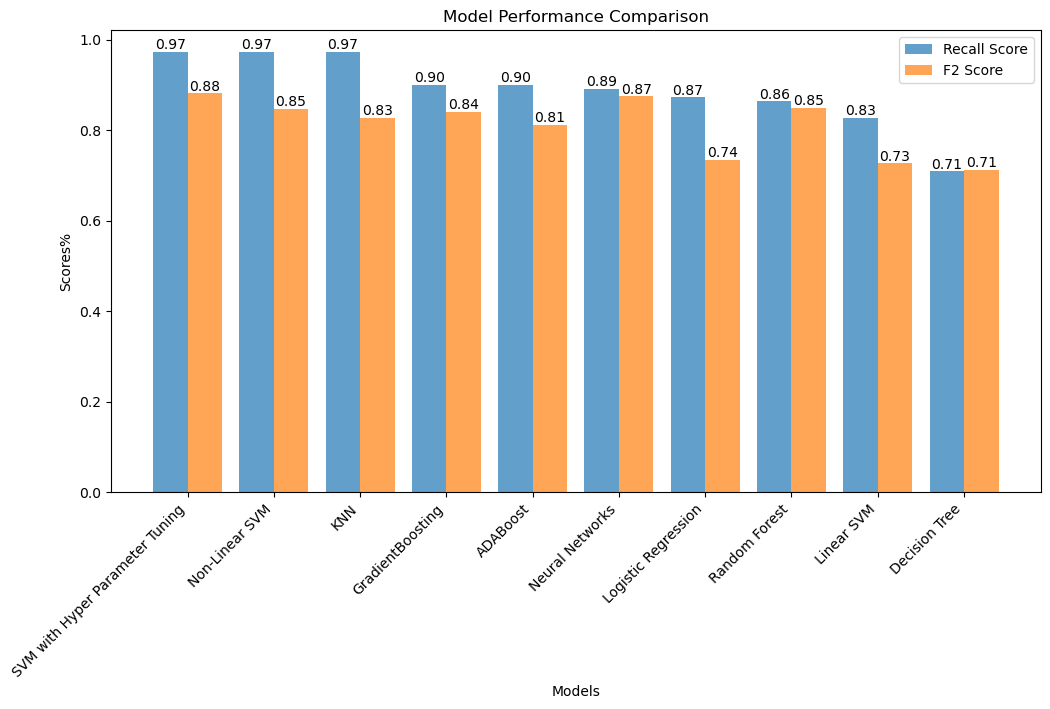

In [60]:
models = [
    "Logistic Regression",
    "Linear SVM",
    "Non-Linear SVM",
    "KNN",
    "Decision Tree",
    "Random Forest",
    "ADABoost",
    "GradientBoosting",
    "Neural Networks",
    "SVM with Hyper Parameter Tuning"
]

recall_scores = [recall_score(y_test, y_pred_log), recall_score(y_test, y_pred_svml), recall_score(y_test, y_pred_svm), recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_dtree), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_ab), recall_score(y_test, y_pred_gb), recall_score(y_test, y_pred_nn),recall_score(y_test, svc_random_search.best_estimator_.predict(X_test)) ]
f2_scores = [fbeta_score(y_test, y_pred_log,beta =2,average='binary'), fbeta_score(y_test, y_pred_svml,beta =2,average='binary'), fbeta_score(y_test, y_pred_svm,beta =2,average='binary'), fbeta_score(y_test, y_pred_knn,beta =2,average='binary'), fbeta_score(y_test, y_pred_dtree,beta =2,average='binary'), fbeta_score(y_test, y_pred_rf,beta =2,average='binary'), fbeta_score(y_test, y_pred_ab,beta =2,average='binary'), fbeta_score(y_test, y_pred_gb,beta =2,average='binary'), fbeta_score(y_test, y_pred_nn,beta =2,average='binary'),fbeta_score(y_test, svc_random_search.best_estimator_.predict(X_test), beta=2,average='binary')]

sorted_models_recall = [x for _, x in sorted(zip(recall_scores, models), reverse=True)]
sorted_recall_scores = sorted(recall_scores, reverse=True)
sorted_f2_scores = [f2_scores[models.index(model)] for model in sorted_models_recall]

bar_width = 0.4
x = np.arange(len(sorted_models_recall))

plt.figure(figsize=(12, 6))
recall_bars = plt.bar(x - bar_width / 2, sorted_recall_scores, bar_width, label='Recall Score', alpha=0.7)
f2_bars = plt.bar(x + bar_width / 2, sorted_f2_scores, bar_width, label='F2 Score', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Scores%')
plt.title('Model Performance Comparison')
plt.legend(loc='best')

plt.xticks(x, sorted_models_recall, rotation=45, ha="right")

for recall_bar, f2_bar in zip(recall_bars, f2_bars):
    plt.text(recall_bar.get_x() + recall_bar.get_width() / 2, recall_bar.get_height(), f'{recall_bar.get_height():.2f}', ha='center', va='bottom')
    plt.text(f2_bar.get_x() + f2_bar.get_width() / 2, f2_bar.get_height(), f'{f2_bar.get_height():.2f}', ha='center', va='bottom')

plt.show()

## SVM with hyperparameter tuning is the appropriate model for this project

__Lets visualize the Confusion Matrix__

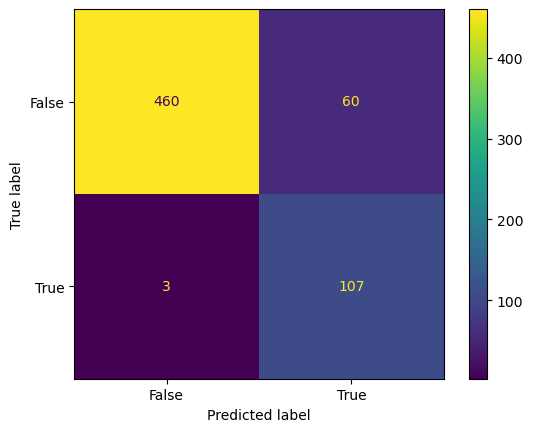

In [61]:
svm_confusion_matrix = confusion_matrix(y_test,svc_random_search.best_estimator_.predict(X_test))

cm_display = ConfusionMatrixDisplay(confusion_matrix = svm_confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

From the confusion matrix it is clear that are low counts of False Negatives (FN), achieving a low count of False Negatives (FN) is important for this business case as it signifies the model's ability to accurately identify customers at risk of churning. This, in turn, enables the company to implement proactive retention strategies, reduce revenue loss and enhance the customer experience.

__Let's examine which features have the most significant impact on our model.__

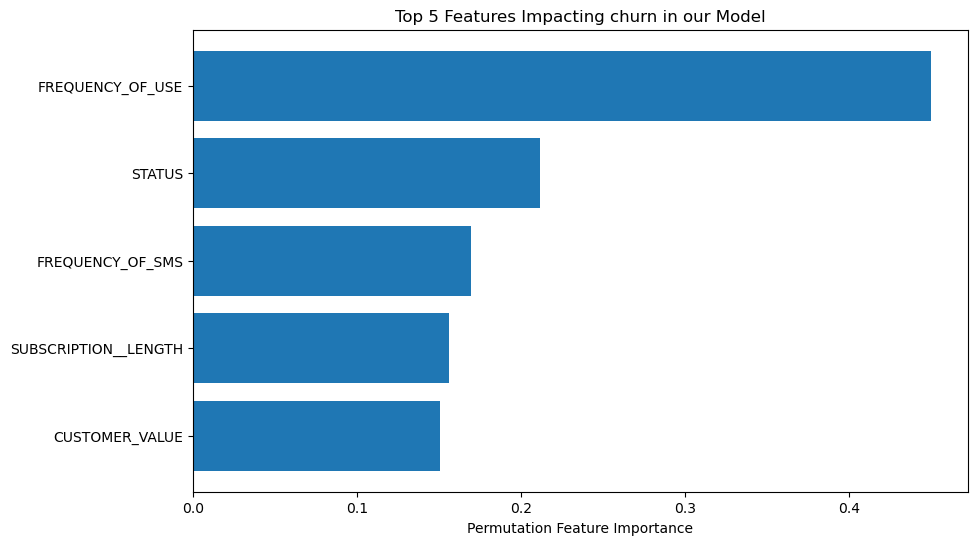

In [62]:
result = permutation_importance(svc_random_search.best_estimator_, X_test, y_test, n_repeats=30, random_state=42, scoring='recall')

importances = result.importances_mean
feature_names = features.columns

sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

num_top_features = 5  

top_features = sorted_feature_names[:num_top_features]
top_importances = sorted_importances[:num_top_features]

plt.figure(figsize=(10, 6))
plt.barh(range(num_top_features), top_importances, align='center')
plt.yticks(range(num_top_features), top_features)
plt.xlabel('Permutation Feature Importance')
plt.title('Top 5 Features Impacting churn in our Model')
plt.gca().invert_yaxis() 
plt.show()

## Top Features effecting the model and recommendations to the company

The significant features identified by the model are instrumental in constructing effective customer retention strategies. By understanding the impact of these features, the company can tailor its retention efforts to reduce churn and improve customer loyalty. These features help in building data-driven strategies that aim to retain customers effectively.

**FREQUENCY OF USE:** The most critical factor affecting churn is how often customers make calls. High-frequency users are less likely to churn, so offering incentives or promotions to encourage more usage may be a strategy to retain customers.

**STATUS:** Identifying and addressing the reasons for customers becoming non-active can be a priority. Proactive measures to keep customers engaged and satisfied can help reduce churn.

**FREQUENCY OF SMS:** Text message usage is also a significant factor. Offering relevant SMS-based promotions or communication may help in retaining customers.

**SUBSCRIPTION LENGTH:** Longer subscriptions are associated with lower churn. Encouraging customers to commit to longer contracts can be a retention strategy.

**CUSTOMER VALUE:** The value associated with each customer is an essential metric. High-value customers are valuable assets, and efforts to retain them should be a business priority.

## How the Model can be used by the company

**Identifying At-Risk Customers**

The comapny can integrate the churn prediction into its routine data analysis procedures to consistently identify customers at risk of churning. This real-time monitoring of customer behavior enables proactive measures.
To effectively utilize the churn prediction model, it's important for the company to incorporate it as a recurring practice within its data analytics framework. This involves consistent model maintenance, including retraining with fresh data and ongoing performance monitoring. These steps ensure the model's predictions remain accurate and aligned with the latest customer behavior.

**Targeted Retention Strategies**

The company can develop company-specific retention strategies customized for at-risk customers. Offer personalized discounts, enhanced customer support, engaging marketing campaigns, and improved service quality to address their specific needs effectively.
Crafting personalized retention strategies is a potent tool in reducing churn. To make these strategies even more impactful, the company should focus on refining and adapting them based on customer feedback and market dynamics. This adaptability helps ensure that the company's efforts to retain customers continue to resonate with changing preferences.

**Customer Segmentation for Enhanced Strategy**

The company can utilize the model's insights to segment its customer base by their risk levels. Tailor retention efforts to different customer segments, recognizing that high-risk customers may require more immediate and aggressive retention strategies, while lower-risk customers may benefit from loyalty programs or lighter-touch interventions. This segmentation optimizes your company's resource allocation and approach for each group. However, the company should maintain flexibility in this approach, periodically evaluating and adjusting segments' effectiveness. Customer behaviors and preferences can evolve, so remaining agile in strategy development is crucial for long-term success.

## Conclusion

In the rapidly expanding telecommunications industry, the persistent issue of customer churn and its potential financial impact have led to a critical question: how to effectively reduce churn and secure long-term profitability ?. Our solution, powered by a predictive machine learning model, presents a proactive method for pinpointing customers who are at risk and implementing personalized retention strategies. By giving precedence to customer retention, organizations can safeguard their revenue, reduce the considerable expenses linked to customer acquisition, and, in the end, achieve sustainable growth.

In conclusion, our predictive model has successfully achieved its primary objectives. We have created an accurate classification model that can effectively identify customers at risk of churning, enabling proactive interventions. Moreover, the comprehensive dataset analysis has unveiled crucial insights into the factors and behaviors influencing customer churn, which forms the foundation for the development of precise and targeted retention strategies. This project equips the telecom company with the knowledge and tools needed to address the challenge of customer churn effectively, ultimately fostering customer loyalty and supporting continuous business growth.